In [1]:
from data_utils import LSTMHarmonyDataset, TransitionMatrixDataset, BagOfTransitionsDataset, LSTMPaddingCollator
import torch
import GridMLM_tokenizers
from GridMLM_tokenizers import CSGridMLMTokenizer
from data_utils import CSGridMLMDataset
import pickle
from models_baseline import LSTMHarmonyModel, TransitionMatrixAutoencoder, BagOfTransitionsAutoencoder
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import plot_utils as pu

/home/maximos/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [3]:
val_dir = '/mnt/ssd2/maximos/data/hooktheory_midi_hr/CA_test'

In [4]:
lstm_np = pu.get_lstm_embeddings_for_data_path(val_dir)
print(lstm_np.shape)

Loading data file.
(758, 256)


In [5]:
matrix_np = pu.get_matrix_embeddings_for_data_path(val_dir)
print(matrix_np.shape)

Loading data file.
(758, 256)


In [6]:
bot_np = pu.get_bot_embeddings_for_data_path(val_dir)
print(bot_np.shape)

Loading data file.
(758, 128)


(758, 2)


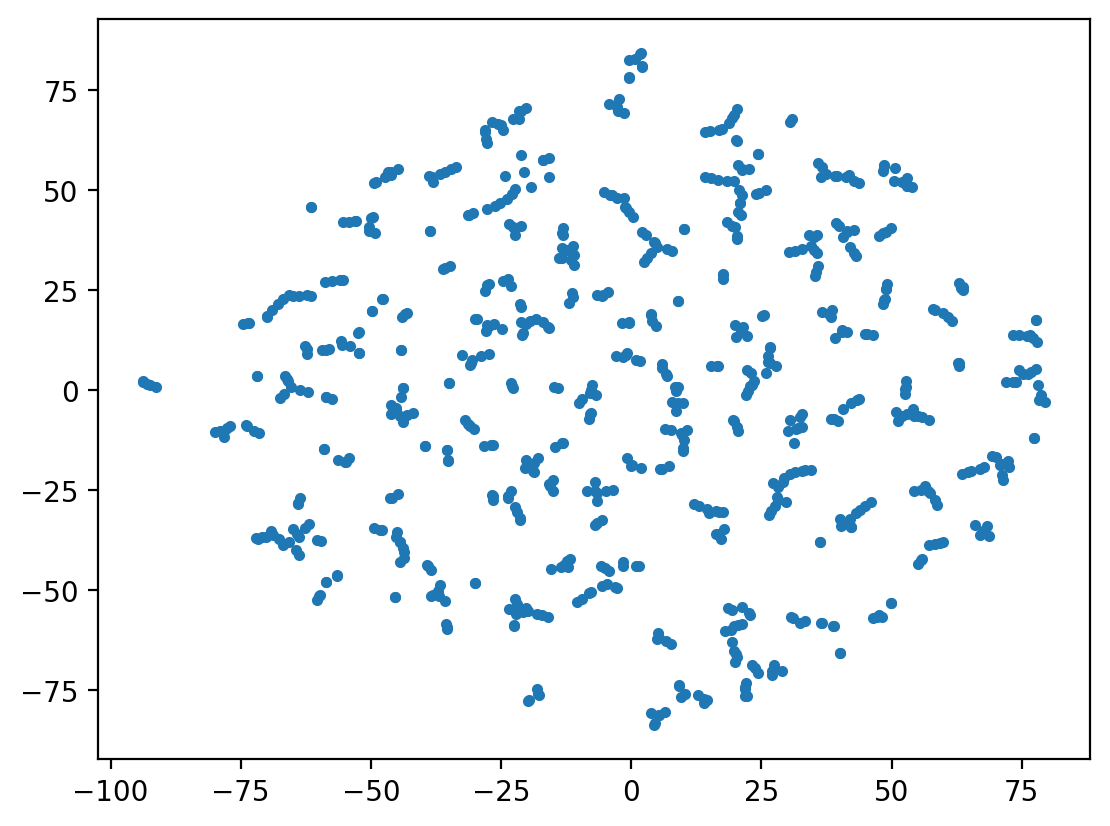

In [7]:
lstm_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(lstm_np)
print(lstm_embedded.shape)
plt.plot(lstm_embedded[:,0], lstm_embedded[:,1],'.')

(758, 2)


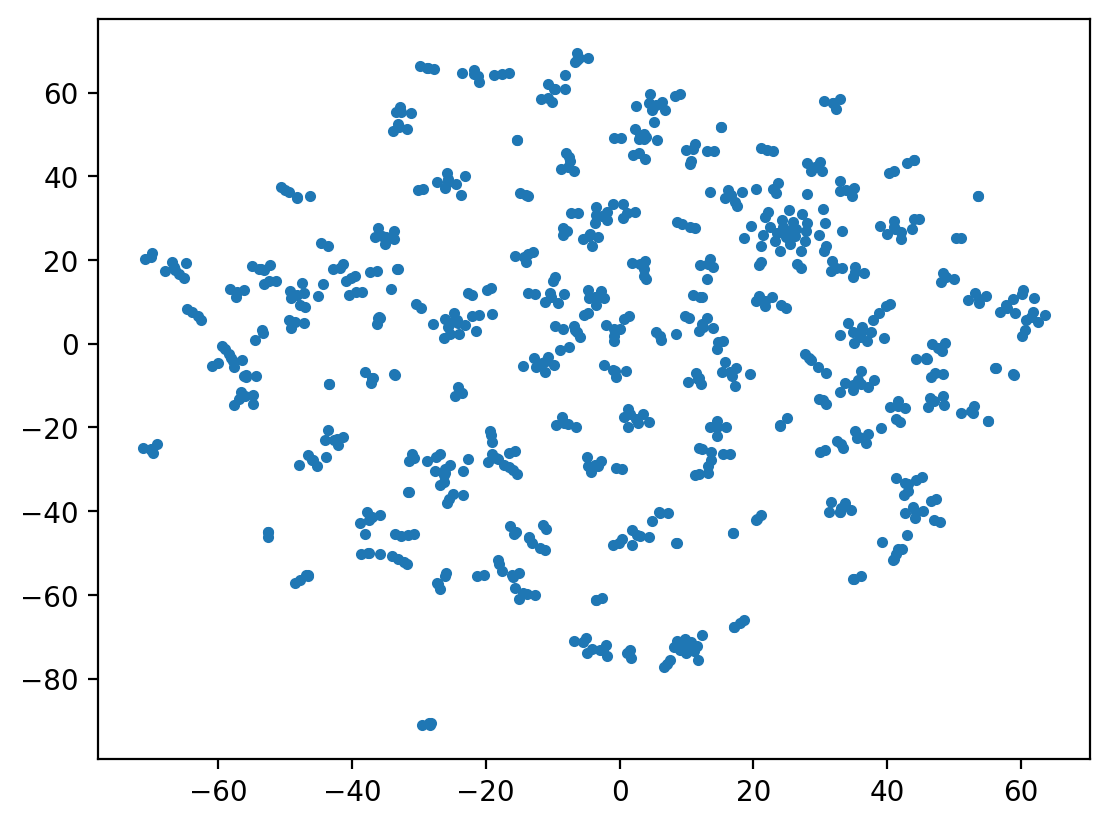

In [8]:
matrix_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(matrix_np)
print(matrix_embedded.shape)
plt.plot(matrix_embedded[:,0], matrix_embedded[:,1],'.')

(758, 2)


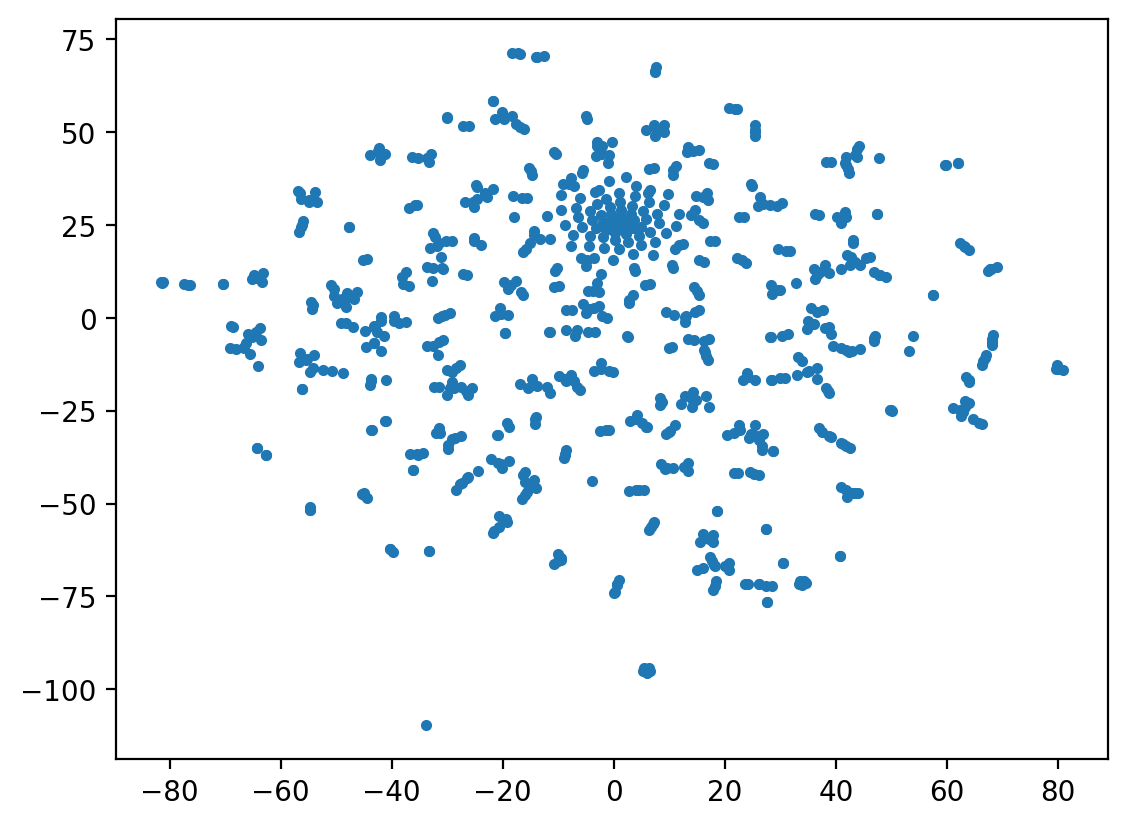

In [9]:
bot_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(bot_np)
print(bot_embedded.shape)
plt.plot(bot_embedded[:,0], bot_embedded[:,1],'.')